In [7]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

## Download NetCDF Data

The NWM Predictions dataset is published as NetCDF files, and available here: https://nomads.ncep.noaa.gov/pub/data/nccf/com/nwm/v2.2/.

This folder usually has a couple days of data. At the time of this writing, `nwm.20221017` was available.

Within that folder, we see a number of options:

```
analysis_assim/
analysis_assim_extend/
analysis_assim_extend_no_da/
analysis_assim_hawaii/
analysis_assim_hawaii_no_da/
analysis_assim_long/
analysis_assim_long_no_da/
analysis_assim_no_da/
analysis_assim_puertorico/
analysis_assim_puertorico_no_da/
forcing_analysis_assim/
forcing_analysis_assim_extend/
forcing_analysis_assim_hawaii/
forcing_analysis_assim_puertorico/
forcing_medium_range/
forcing_short_range/
forcing_short_range_hawaii/
forcing_short_range_puertorico/
long_range_mem1/
long_range_mem2/
long_range_mem3/
long_range_mem4/
medium_range_mem1/
medium_range_mem2/
medium_range_mem3/
medium_range_mem4/
medium_range_mem5/
medium_range_mem6/
medium_range_mem7/
medium_range_no_da/
short_range/
short_range_hawaii/
short_range_hawaii_no_da/
short_range_puertorico/
short_range_puertorico_no_da/
usgs_timeslices/
```

We begin with the short-range forecast, which has Streamflow Channel Routing files for 18 cycles at midnight:

```
nwm.t00z.short_range.channel_rt.f001.conus.nc
nwm.t00z.short_range.channel_rt.f002.conus.nc
nwm.t00z.short_range.channel_rt.f003.conus.nc
nwm.t00z.short_range.channel_rt.f004.conus.nc
nwm.t00z.short_range.channel_rt.f005.conus.nc
nwm.t00z.short_range.channel_rt.f006.conus.nc
nwm.t00z.short_range.channel_rt.f007.conus.nc
nwm.t00z.short_range.channel_rt.f008.conus.nc
nwm.t00z.short_range.channel_rt.f009.conus.nc
nwm.t00z.short_range.channel_rt.f010.conus.nc
nwm.t00z.short_range.channel_rt.f011.conus.nc
nwm.t00z.short_range.channel_rt.f012.conus.nc
nwm.t00z.short_range.channel_rt.f013.conus.nc
nwm.t00z.short_range.channel_rt.f014.conus.nc
nwm.t00z.short_range.channel_rt.f015.conus.nc
nwm.t00z.short_range.channel_rt.f016.conus.nc
nwm.t00z.short_range.channel_rt.f017.conus.nc
nwm.t00z.short_range.channel_rt.f018.conus.nc
```

Let's download these files:

In [3]:
PREDICTIONS_DATADIR = '/opt/data/nwm-predictions'

In [17]:
!mkdir -p /opt/data/nwm-predictions && cd /opt/data/nwm-predictions && seq -f 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/nwm/v2.2/nwm.20221017/short_range/nwm.t00z.short_range.channel_rt.f%03g.conus.nc' 1 18 | xargs -P 0 -n 1 wget -q

os.listdir(PREDICTIONS_DATADIR)

['nwm.t00z.short_range.channel_rt.f001.conus.nc',
 'nwm.t00z.short_range.channel_rt.f017.conus.nc',
 'nwm.t00z.short_range.channel_rt.f016.conus.nc',
 'nwm.t00z.short_range.channel_rt.f010.conus.nc',
 'nwm.t00z.short_range.channel_rt.f011.conus.nc',
 'nwm.t00z.short_range.channel_rt.f007.conus.nc',
 'nwm.t00z.short_range.channel_rt.f006.conus.nc',
 'nwm.t00z.short_range.channel_rt.f014.conus.nc',
 'nwm.t00z.short_range.channel_rt.f015.conus.nc',
 'nwm.t00z.short_range.channel_rt.f009.conus.nc',
 'nwm.t00z.short_range.channel_rt.f008.conus.nc',
 'nwm.t00z.short_range.channel_rt.f003.conus.nc',
 'nwm.t00z.short_range.channel_rt.f002.conus.nc',
 'nwm.t00z.short_range.channel_rt.f004.conus.nc',
 'nwm.t00z.short_range.channel_rt.f005.conus.nc',
 'nwm.t00z.short_range.channel_rt.f018.conus.nc',
 'nwm.t00z.short_range.channel_rt.f013.conus.nc',
 'nwm.t00z.short_range.channel_rt.f012.conus.nc']

## Sample Downloaded Data

Before we do any further work with it, let's open one of the files in the dataset and take a look at it.

In [20]:
ds = xr.open_dataset(f'{PREDICTIONS_DATADIR}/nwm.t00z.short_range.channel_rt.f001.conus.nc')
ds

<xarray.Dataset>
Dimensions:         (time: 1, reference_time: 1, feature_id: 2776738)
Coordinates:
  * time            (time) datetime64[ns] 2022-10-17T01:00:00
  * reference_time  (reference_time) datetime64[ns] 2022-10-17
  * feature_id      (feature_id) int32 101 179 181 ... 1180001803 1180001804
Data variables:
    crs             |S1 ...
    streamflow      (feature_id) float64 ...
    nudge           (feature_id) float64 ...
    velocity        (feature_id) float64 ...
    qSfcLatRunoff   (feature_id) float64 ...
    qBucket         (feature_id) float64 ...
    qBtmVertRunoff  (feature_id) float64 ...
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v2.2
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2022-10-17_00:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2022-10-17_01:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

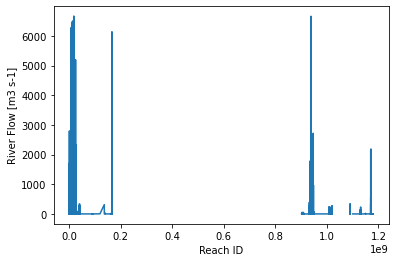

In [24]:
ds['streamflow'].plot()

## Convert to Zarr

Let's open the entire dataset, using [recommendations from XArray on reading multiple NetCDF files](https://docs.xarray.dev/en/stable/user-guide/io.html#reading-multi-file-datasets).


In [4]:
%%time
ds = xr.open_mfdataset(f'{PREDICTIONS_DATADIR}/*.nc',
                       parallel=True,
                       engine='h5netcdf',
                       concat_dim='time',
                       combine='nested',
                       data_vars=['streamflow'],
                       coords='minimal',
                       compat='override'
                      )
ds

CPU times: user 1.99 s, sys: 755 ms, total: 2.74 s
Wall time: 1.65 s


<xarray.Dataset>
Dimensions:         (time: 18, reference_time: 1, feature_id: 2776738)
Coordinates:
  * time            (time) datetime64[ns] 2022-10-17T01:00:00 ... 2022-10-17T...
  * reference_time  (reference_time) datetime64[ns] 2022-10-17
  * feature_id      (feature_id) int32 101 179 181 ... 1180001803 1180001804
Data variables:
    crs             |S1 ...
    streamflow      (time, feature_id) float64 dask.array<chunksize=(1, 2776738), meta=np.ndarray>
    nudge           (feature_id) float64 dask.array<chunksize=(2776738,), meta=np.ndarray>
    velocity        (feature_id) float64 dask.array<chunksize=(2776738,), meta=np.ndarray>
    qSfcLatRunoff   (feature_id) float64 dask.array<chunksize=(2776738,), meta=np.ndarray>
    qBucket         (feature_id) float64 dask.array<chunksize=(2776738,), meta=np.ndarray>
    qBtmVertRunoff  (feature_id) float64 dask.array<chunksize=(2776738,), meta=np.ndarray>
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v2.2
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2022-10-17_00:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2022-10-17_01:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

Now let's convert it to Zarr.

In [27]:
%%time
ds.to_zarr(f'{PREDICTIONS_DATADIR}-channel_rt.zarr', mode='w')

CPU times: user 1.27 s, sys: 68.7 ms, total: 1.34 s
Wall time: 763 ms


### Compare Dataset Sizes

In [5]:
!du -sh /opt/data/*

217M	/opt/data/nwm-predictions
53M	/opt/data/nwm-predictions-channel_rt.zarr


### Check Data Correctness

In [15]:
dsz = xr.open_dataset(f'{PREDICTIONS_DATADIR}-channel_rt.zarr')

all(np.allclose(ds[v].to_numpy(), dsz[v].to_numpy(), equal_nan=True)
    for v in ds.data_vars.keys() if len(ds[v].shape) > 0)

/opt/conda/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'h5netcdf' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/opt/conda/lib/python3.9/site-packages/xarray/backends/plugins.py:110: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


True

# Examples Shownig Reading From S3

## Reading NetCDF Files

In [6]:
import s3fs
import xarray as xr

fs = s3fs.S3FileSystem(anon=True)
s3_glob_url = 's3://noaa-nwm-pds/nwm.20221030/short_range/nwm.t18z.short_range.channel_rt.*.conus.nc'

remote_files = fs.glob(s3_glob_url)
fileset = [fs.open(file) for file in remote_files]

ds = xr.open_mfdataset(fileset, engine='h5netcdf')
ds

<xarray.Dataset>
Dimensions:         (time: 18, reference_time: 1, feature_id: 2776738)
Coordinates:
  * time            (time) datetime64[ns] 2022-10-30T19:00:00 ... 2022-10-31T...
  * reference_time  (reference_time) datetime64[ns] 2022-10-30T18:00:00
  * feature_id      (feature_id) int32 101 179 181 ... 1180001803 1180001804
Data variables:
    crs             (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    streamflow      (time, feature_id) float64 dask.array<chunksize=(1, 2776738), meta=np.ndarray>
    nudge           (time, feature_id) float64 dask.array<chunksize=(1, 2776738), meta=np.ndarray>
    velocity        (time, feature_id) float64 dask.array<chunksize=(1, 2776738), meta=np.ndarray>
    qSfcLatRunoff   (time, feature_id) float64 dask.array<chunksize=(1, 2776738), meta=np.ndarray>
    qBucket         (time, feature_id) float64 dask.array<chunksize=(1, 2776738), meta=np.ndarray>
    qBtmVertRunoff  (time, feature_id) float64 dask.array<chunksize=(1, 2776738), meta=np.ndarray>
Attributes: (12/19)
    TITLE:                      OUTPUT FROM NWM v2.2
    featureType:                timeSeries
    proj4:                      +proj=lcc +units=m +a=6370000.0 +b=6370000.0 ...
    model_initialization_time:  2022-10-30_18:00:00
    station_dimension:          feature_id
    model_output_valid_time:    2022-10-30_19:00:00
    ...                         ...
    model_configuration:        short_range
    dev_OVRTSWCRT:              1
    dev_NOAH_TIMESTEP:          3600
    dev_channel_only:           0
    dev_channelBucket_only:     0
    dev:                        dev_ prefix indicates development/internal me...

## Reading Geopackages from S3

Note: This requires setting the `AWS_REQUESTER_PAYS` environment variable to `requester`, so we can access the `s3://noaa-nws-owp-fim` bucket.

In [1]:
import geopandas as gpd

s3_path = 's3://noaa-nws-owp-fim/hand_fim/inputs/nhdplus_vectors/2102/NHDFlowline2102.gpkg'

# read_file can read directly from S3, as long as the AWS environment variables are set correctly
g = gpd.read_file(s3_path)
g

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,Permanent_Identifier,FDate,Resolution,GNIS_ID,GNIS_Name,LengthKM,ReachCode,FlowDir,WBArea_Permanent_Identifier,FType,FCode,MainPath,InNetwork,VisibilityFilter,Shape_Length,NHDPlusID,VPUID,Enabled,geometry
0,{9DD3C12C-31E7-4BB4-BFFC-01055CC85980},2013-07-15T00:00:00,2,None,None,0.061850,21020001000388,0,None,566,56600,0,0,0,0.000576,8.500020e+13,2102,1,"MULTILINESTRING ((3337200.980 47052.364, 33372..."
1,{081875A5-EDED-4609-8659-2E7108B3F788},2013-07-15T00:00:00,2,None,None,0.053000,21020001000406,0,None,566,56600,0,0,0,0.000489,8.500020e+13,2102,1,"MULTILINESTRING ((3342320.598 49176.247, 33423..."
2,26478645,2012-03-10T08:25:01,2,01614391,Turpentine Run,0.753000,21020001000044,1,None,460,46003,0,1,0,0.007089,8.500020e+13,2102,1,"MULTILINESTRING ((3353287.742 51382.963, 33533..."
3,26481876,2012-03-10T08:27:01,2,None,None,0.551000,21020002000176,1,None,460,46003,0,1,0,0.005139,8.500020e+13,2102,1,"MULTILINESTRING ((3378241.544 -8784.111, 33782..."
4,26481774,2012-03-10T08:27:02,2,None,None,0.952000,21020002000163,1,None,460,46003,0,1,0,0.008827,8.500020e+13,2102,1,"MULTILINESTRING ((3375918.067 -4944.398, 33759..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,{88FF6BDE-CE9E-4A70-A13B-7DADE9C9011E},2013-11-09T00:00:00,2,None,None,0.656666,21020002000755,1,None,566,56600,0,1,0,0.005569,8.500020e+13,2102,1,"MULTILINESTRING ((3389646.133 -9646.808, 33896..."
769,26481592,2012-03-10T08:27:07,2,01614312,Salt River,0.406000,21020002000237,1,26480458,558,55800,0,1,0,0.003702,8.500020e+13,2102,1,"MULTILINESTRING ((3387141.771 -1146.496, 33871..."
770,26480942,2012-03-10T08:27:02,2,None,None,0.132000,21020002000082,0,None,336,33600,0,0,0,0.001197,8.500020e+13,2102,1,"MULTILINESTRING ((3389973.087 -5973.708, 33900..."
771,26480872,2012-03-10T08:27:02,2,None,None,0.715000,21020002000155,1,None,460,46003,0,1,0,0.006608,8.500020e+13,2102,1,"MULTILINESTRING ((3393666.609 -2285.108, 33936..."


In [2]:
s3_path = 's3://noaa-nws-owp-fim/hand_fim/inputs/wbd/WBD_National_GDB.gdb'

g = gpd.read_file(s3_path, rows=10)
g

,tnmid,metasourceid,sourcedatadesc,sourceoriginator,sourcefeatureid,loaddate,referencegnis_ids,areaacres,areasqkm,states,...,name,hutype,humod,tohuc,noncontributingareaacres,noncontributingareasqkm,globalid,shape_Length,shape_Area,geometry
0,{AAF0D733-828B-4B8E-9E52-388A49AC0A23},{33EA2180-A425-4AE6-951F-ABCBBF25B893},None,None,None,2017-05-25T09:05:31+00:00,None,13211.47,53.46,"IA,MN",...,Judicial Ditch Number Thirteen,S,NM,070200090403,0.0,0.0,{991AACA7-E29C-11E2-8094-0021280458E6},0.637165,0.005951,"MULTIPOLYGON (((-94.01060 43.56298, -94.01046 ..."
1,{FEEC96BB-D4C0-468F-A345-6996A458D7A7},{33EA2180-A425-4AE6-951F-ABCBBF25B893},None,None,None,2017-05-25T09:05:42+00:00,None,10514.34,42.55,MN,...,West Branch Lac qui Parle River,S,NM,070200030705,0.0,0.0,{A220BE40-E29C-11E2-8094-0021280458E6},0.456829,0.004851,"MULTIPOLYGON (((-96.13949 44.97296, -96.13908 ..."
2,{5954C8E6-710A-4F46-9409-C39F7A4E8031},{33EA2180-A425-4AE6-951F-ABCBBF25B893},None,None,None,2017-05-25T09:05:42+00:00,None,15561.22,62.97,MN,...,County Ditch Number Thirtyfour,S,NM,070200030603,0.0,0.0,{A220F315-E29C-11E2-8094-0021280458E6},0.701524,0.007178,"MULTIPOLYGON (((-95.91504 44.97483, -95.91437 ..."
3,{6042907D-3DB7-4C8A-9362-889E4CDC4102},None,None,None,None,2013-01-18T07:08:11+00:00,None,31033.21,125.59,GA,...,Upper Horse Creek,S,NM,030701040702,0.0,0.0,{96CC80E1-E29C-11E2-8094-0021280458E6},0.554951,0.011983,"MULTIPOLYGON (((-82.99057 31.98012, -82.99115 ..."
4,{A802D673-860B-4BD3-9EA1-1C954F9F03B9},None,None,None,None,2013-01-18T07:08:11+00:00,None,28839.94,116.71,GA,...,Crooked Creek,S,NM,030701040507,0.0,0.0,{96CBF8CF-E29C-11E2-8094-0021280458E6},0.650165,0.011146,"MULTIPOLYGON (((-83.13956 32.08949, -83.13932 ..."
5,{B0F422F7-5BDE-4608-B60E-C5D3274B8749},None,None,None,None,2013-01-18T07:08:11+00:00,None,49115.06,198.76,GA,...,Mizell Creek-Ocmulgee River,S,NM,030701040802,0.0,0.0,{96CC62C1-E29C-11E2-8094-0021280458E6},0.784197,0.018956,"MULTIPOLYGON (((-83.14510 32.02342, -83.14498 ..."
6,{DF84FD2E-015D-4B39-9409-68BAF583D58C},{33EA2180-A425-4AE6-951F-ABCBBF25B893},None,None,None,2017-05-25T09:05:42+00:00,None,20477.59,82.87,MN,...,County Ditch Number Twentynine A,S,NM,070200030702,0.0,0.0,{A22127F8-E29C-11E2-8094-0021280458E6},0.747552,0.009439,"MULTIPOLYGON (((-96.27678 44.93935, -96.27532 ..."
7,{86D2CC50-DCCE-4168-87EF-3C9D46FE2114},{C2DD1F95-EC5C-4FCF-9EB7-9B044D2B0DB4},None,None,None,2017-05-25T09:52:59+00:00,None,23835.03,96.46,MN,...,Bear Creek-Snake River,S,NM,070300050201,0.0,0.0,{A070A8A0-E29C-11E2-8094-0021280458E6},0.580060,0.011174,"MULTIPOLYGON (((-92.81602 45.91518, -92.81597 ..."
8,{82FBC812-6068-41C5-A486-6E2BAFF31912},None,None,None,None,2013-01-18T07:08:11+00:00,None,36657.30,148.35,GA,...,Middle Horse Creek,S,NM,030701040703,0.0,0.0,{96CC97E9-E29C-11E2-8094-0021280458E6},0.696581,0.014144,"MULTIPOLYGON (((-82.95812 31.98096, -82.95804 ..."
9,{D64CC50D-33CD-43A1-8FED-A43524B2A383},{33EA2180-A425-4AE6-951F-ABCBBF25B893},None,None,None,2017-05-25T09:05:42+00:00,None,25142.88,101.75,MN,...,County Ditch Number Seventynine-Lac qui Parle ...,S,NM,070200030705,0.0,0.0,{A22146C3-E29C-11E2-8094-0021280458E6},0.790646,0.011584,"MULTIPOLYGON (((-96.02941 44.92618, -96.02912 ..."
